# Libraries import

In [3]:
import xarray as xr 


# Open Netcdf datasets via Opendap requests

**Dataset title**: Detailed observations of the spatial and temporal distribution of rainfall and drizzle in Lopik, Netherlands

[Link to dataset 1](https://data.4tu.nl/articles/_/12696887/1) 

Comments: Go to the opendap data service at the bottom of the dataset landing page and click on the link and go to the folder 2019/01/01 

In [ ]:
netcdf_file="https://opendap.4tu.nl/thredds/dodsC/IDRA/2019/01/01/IDRA_2019-01-01_00-00_raw_data.nc" # (weights 1GB)


In [ ]:
xrds = xr.open_dataset(netcdf_file,engine="netcdf4")

## Exploring the netcdf structure

A classic NetCDF file like this one can be broken down into 3 components:
- dimensions, variables and global attributes.

- The variables can be broken down into coordinate variables and data variables. Sometimes 
they are displayed separately like here, but if you open a NetCDF file using different software the coordinate variables and data variables might be displayed together.

In [5]:
xrds

<xarray.Dataset> Size: 909MB
Dimensions:                         (time_raw_data: 73728,
                                     sample_beat_signal: 1024,
                                     time_processed_data: 144, range: 512,
                                     scalar: 1)
Coordinates:
  * time_raw_data                   (time_raw_data) datetime64[ns] 590kB 2019...
  * sample_beat_signal              (sample_beat_signal) int16 2kB 1 2 ... 1024
  * time_processed_data             (time_processed_data) datetime64[ns] 1kB ...
  * range                           (range) int32 2kB 0 30 60 ... 15300 15330
Dimensions without coordinates: scalar
Data variables: (12/27)
    iso_dataset                     |S64 64B ...
    product                         |S64 64B ...
    station_details                 |S64 64B ...
    noise_power_horizontal          (range) float32 2kB ...
    noise_power_vertical            (range) float32 2kB ...
    azimuth_raw_data                (time_raw_data) float32 295kB ...
    ...                              ...
    equivalent_reflectivity_factor  (time_processed_data, range) float32 295kB ...
    differential_reflectivity       (time_processed_data, range) float32 295kB ...
    linear_depolarisation_ratio     (time_processed_data, range) float32 295kB ...
    radial_velocity                 (time_processed_data, range) float32 295kB ...
    spectrum_width                  (time_processed_data, range) float32 295kB ...
    differential_phase              (time_processed_data, range) float32 295kB ...
Attributes:
    title:         IDRA Raw Data
    institution:   Delft University of Technology (DUT)
    history:       Raw IDRA data, complex I/Q signals
    references:    J. Figueras i Ventura, Design of a High Resolution X-band ...
    Conventions:   CF-1.4
    location:      CESAR observatory, the Netherlands
    source:        Ground-based polarimetric weather radar.
    example:       http://ftp.tudelft.nl/TUDelft/irctr-rse/idra/
    DODS.strlen:   1
    DODS.dimName:  scalar

## Attributes

Conventions is probably the most important global attribute because it tells you (and a machine) how to interpret the rest of the file. CF-1.4 refers to version 1.4 of the CF conventions, which you can find here:

https://cfconventions.org/Data/cf-conventions/cf-conventions-1.4/build/cf-conventions.html

In [6]:
xrds.attrs

{'title': 'IDRA Raw Data',
 'institution': 'Delft University of Technology (DUT)',
 'history': 'Raw IDRA data, complex I/Q signals',
 'references': 'J. Figueras i Ventura, Design of a High Resolution X-band Doppler Polarimetric Radar, PhD Thesis, TU Delft, 2009. @ http://repository.tudelft.nl/view/ir/uuid%3Ad90b9ad6-237b-435d-9dc5-5660d9e7fbdd/',
 'Conventions': 'CF-1.4',
 'location': 'CESAR observatory, the Netherlands',
 'source': 'Ground-based polarimetric weather radar.',
 'example': 'http://ftp.tudelft.nl/TUDelft/irctr-rse/idra/',
 'DODS.strlen': np.int32(1),
 'DODS.dimName': 'scalar'}

## Dimensions



In [7]:
xrds.dims

FrozenMappingWarningOnValuesAccess({'time_raw_data': 73728, 'sample_beat_signal': 1024, 'time_processed_data': 144, 'range': 512, 'scalar': 1})

A FrozenDict is an immutable dictionary used by xarray for safety, consistency, and performance.

You cannot modify it directly, which helps prevent accidental dimension changes in your datasets.

In other words:

- Dimensions are fixed:

- You can’t accidentally change their length.

- You have to explicitly create new datasets or slices if you want different dimensions.

## Coordinate and data variables

### Coordinate variables 

Coordinate variables in xarray (and NetCDF, following the CF conventions) are variables used to label and index data along each dimension clearly.

- Coordinate variables give context to the dimensions.

They usually represent:

- time points (e.g., timestamps)

- spatial locations (latitude, longitude, altitude, depth, distance)

- other meaningful numeric or categorical indexes

In [8]:
xrds.coords

Coordinates:
  * time_raw_data        (time_raw_data) datetime64[ns] 590kB 2019-01-01T00:0...
  * sample_beat_signal   (sample_beat_signal) int16 2kB 1 2 3 ... 1022 1023 1024
  * time_processed_data  (time_processed_data) datetime64[ns] 1kB 2019-01-01T...
  * range                (range) int32 2kB 0 30 60 90 ... 15270 15300 15330

In [12]:
## Look at the coordinate variables' attributes

xrds.coords['time_raw_data'].attrs, xrds.coords['sample_beat_signal'].attrs,xrds.coords['range'].attrs

({'standard_name': 'time', 'axis': 'T'},
 {'standard_name': 'sample',
  'units': 'Samples of the beat signal collected at a sampling frequency of 2.5 MHz',
  'axis': 'S'},
 {'long_name': 'range',
  'scan_type': 'non-fixed',
  'units': 'm',
  'comment': 'Slant range (meter) to the leading edge of the range bins. The radial extension of the range bins is provided by the variable <range_resolution>.'})

### Data variables

- Data variables are the primary measurements or observations stored in your dataset.

- They are the main scientific or observational values you're analyzing.

- Each data variable is associated with one or more dimensions (and thus coordinates)

In [13]:
xrds.data_vars

Data variables:
    iso_dataset                     |S64 64B ...
    product                         |S64 64B ...
    station_details                 |S64 64B ...
    noise_power_horizontal          (range) float32 2kB ...
    noise_power_vertical            (range) float32 2kB ...
    azimuth_raw_data                (time_raw_data) float32 295kB ...
    azimuth_processed_data          (time_processed_data) float32 576B ...
    range_resolution                (scalar) int32 4B ...
    radiation_wavelength            (scalar) float32 4B ...
    frequency_excursion             (scalar) int32 4B ...
    sweep_time                      (scalar) float32 4B ...
    tx_power                        (scalar) int32 4B ...
    sample_size                     (scalar) int32 4B ...
    beam_width                      (scalar) float32 4B ...
    elevation_angle                 (scalar) float32 4B ...
    i_hh                            (time_raw_data, sample_beat_signal) int16 151MB ...
    q_hh    

In [14]:
xrds.data_vars["radial_velocity"].attrs

{'long_name': 'radial Doppler velocitiy for transmitted horizontal polarisation',
 'units': 'ms-1',
 'comment': 'Radial Doppler velocity estimated from the Doppler phase shift on a sweep to sweep basis.'}

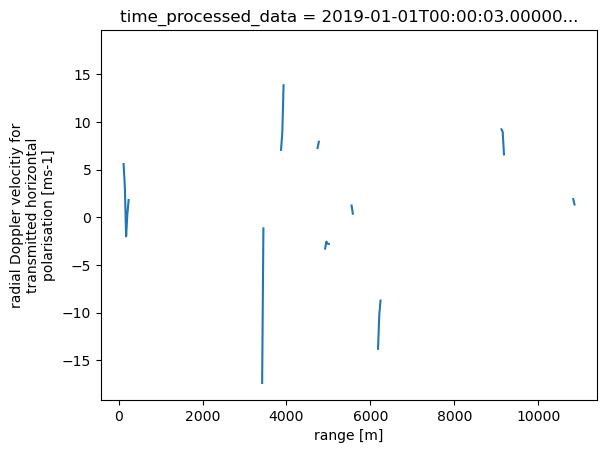

In [17]:
## Look at the coordinate variables

xrds["radial_velocity"].isel(time_processed_data=0).plot()


In [21]:
xrds.data_vars["spectrum_width"].attrs, xrds.data_vars["spectrum_width"].dims

({'long_name': 'spectrum width',
  'units': 'ms-1',
  'comment': 'Spectrum width for horizontal polarisation transmitted.'},
 ('time_processed_data', 'range'))

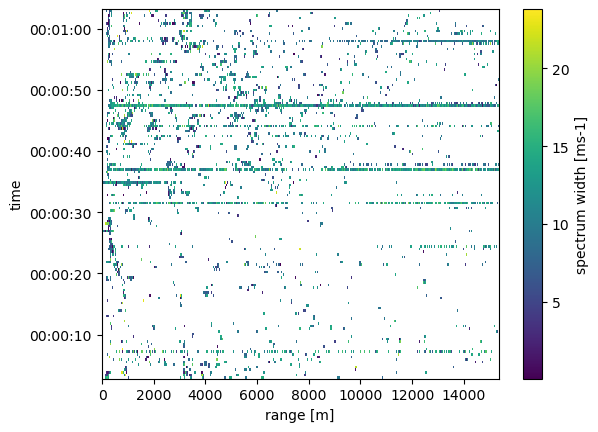

In [20]:
xrds["spectrum_width"].plot()

In [ ]:
## Open a netcdf dataset that does not provide any metadata (bad practice)

In [22]:
netcdf_file_2="https://opendap.4tu.nl/thredds/dodsC/data2/uuid/9604a1b0-13b6-4f23-bd6c-bb028591307c/wind-2008.nc"
xrds_2=xr.open_dataset(netcdf_file_2,engine="netcdf4")

In [23]:
xrds_2.attrs

{'title': 'DENlab wind data, raw, 2008'}

In [24]:
xrds_2

<xarray.Dataset> Size: 144MB
Dimensions:  (time: 12040260)
Coordinates:
  * time     (time) datetime64[ns] 96MB 2007-12-31T23:59:49 ... 2008-05-20T14...
Data variables:
    v_wind   (time) float32 48MB ...
Attributes:
    title:    DENlab wind data, raw, 2008

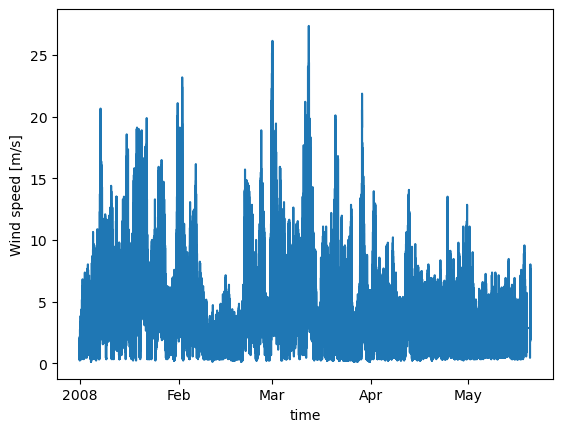

In [25]:
xrds_2["v_wind"].plot()

🚨 **Why is NOT following the CF Convention a bad practice?**

1. Limited interpretability
Without clear metadata (e.g., units, descriptions, reference systems), data is ambiguous.

Users can misunderstand or incorrectly interpret data.

2. Poor interoperability
Tools relying on conventions (e.g., visualization software, OPeNDAP servers) expect clearly defined attributes and structures.

Non-standard files cannot easily integrate into data-processing workflows.

3. Reduced Reusability and Reproducibility
Missing standard conventions → extra effort to reuse or verify results.

Others may avoid using unclear or non-standard data.

4. Reduced Findability
Convention-based metadata improves searchability in data catalogs and repositories.

✅ Benefits of CF-Conventions (Climate & Forecast)

CF Conventions specify:

- Dimensions and Coordinates clearly labeled (e.g., latitude, longitude, height, time).

- Units, standard_name, and long_name attributes clearly documented.

- Variables structured in standardized ways, easily readable by common tools (xarray, Panoply, ncview).

- Improved data interoperability, allowing easier sharing and reuse of data in science communities.

## 📚 Minimal CF-compliance checklist

| CF Element                        | Required?     | Example                                  |
|-----------------------------------|---------------|------------------------------------------|
| **Conventions global attribute**  | ✅ Mandatory  | `Conventions = "CF-1.10"`                |
| **Dimensions clearly defined**    | ✅ Mandatory  | `time`, `latitude`, `longitude`, `height`|
| **Variable attributes: units**    | ✅ Mandatory  | `units = "m s-1"`                        |
| **Variable attributes: standard_name** | ✅ Recommended | `standard_name = "northward_wind"`     |
| **Coordinate attributes: axis**   | ✅ Recommended | `axis = "T"` (for time)                 |
| **Global attributes: metadata**   | ✅ Recommended | `title`, `institution`, `history`, `source`|






## 🌟 Summary: Why CF is Essential

| Without CF ❌                  | With CF ✅                               |
|--------------------------------|-----------------------------------------|
| Ambiguous metadata             | Explicit metadata and context            |
| Difficult reuse                | Easy integration into workflows          |
| Limited interoperability       | Highly interoperable across tools        |
| Harder long-term archival      | Optimized for preservation and sharing   |

## How to adjust this dataset to fulfill the CF convention (maybe as a follow up)



In [ ]:

# step 1 import libraries

import pandas as pd
import numpy as np 

# Step 2: Add latitude, longitude, height coordinates explicitly
## Assumptions: Measurements are taken at one fixed location, - The measurement device or station location doesn’t change over time,  
#If your sensor moved or if you had multiple locations, you'd define coordinates as arrays.

ds=xrds_2
ds = ds.assign_coords(
    latitude=52.0,
    longitude=4.3,
    height=10.0
)

# Step 3: Add CF-compliant attributes explicitly
# Latitude attributes , Latitude and Longitude explicitly identify the geographical location of the measurements.
ds["latitude"].attrs.update({
    "units": "degrees_north",
    "standard_name": "latitude"
})

# Longitude attributes
ds["longitude"].attrs.update({
    "units": "degrees_east",
    "standard_name": "longitude"
})

# Height attributes, Height explicitly describes the vertical position of measurement (e.g., sensor height above ground).
ds["height"].attrs.update({
    "units": "m",
    "standard_name": "height",
    "positive": "up"
})


# Time attributes
ds["time"].attrs.update({
    "standard_name": "time",
    "axis": "T",
    "long_name": "Time of measurement"
})

# Data variable attributes
ds["v_wind"].attrs.update({
    "standard_name": "northward_wind",
    "long_name": "Northward component of wind velocity"
})

# Global attributes for CF-compliance
ds.attrs.update({
    "Conventions": "CF-1.10",
    "institution": "Delft University of Technology",
    "source": "DENlab Wind Sensor",
    "history": f"Converted to CF conventions on {pd.Timestamp.now()}"
})

# Step 4: Save to a CF-compliant NetCDF file
ds.to_netcdf("denlab_wind_cf.nc")

print("CF-compliant NetCDF file created: 'denlab_wind_cf.nc'")


In [ ]:
xr.open_dataset("denlab_wind_cf.nc")